#FindDefault (Prediction of Credit Card fraud)
**Problem Statement:**

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/drive/My Drive/datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.shape

(284807, 31)

## Exploratory Data Analysis & Data Preprocessing

<Axes: >

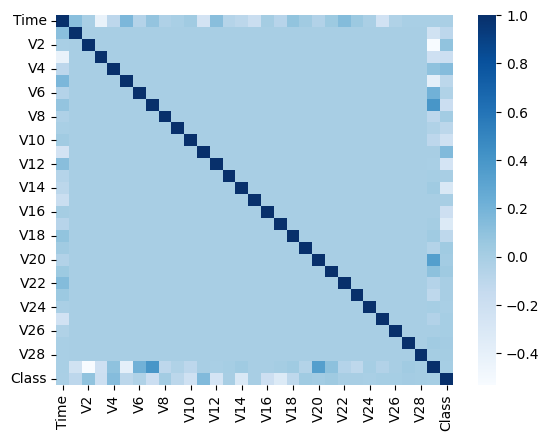

In [ ]:
sns.heatmap(df.corr(),cmap='Blues')

In [ ]:
from scipy.stats import skew

In [ ]:
# checking skewness
for col in df.columns:
    print('{} ---> Skew ={}'.format(col,skew(df[col])))

Time ---> Skew =-0.03556743068120296
V1 ---> Skew =-3.2806500242974597
V2 ---> Skew =-4.624841215435372
V3 ---> Skew =-2.2401436419172027
V4 ---> Skew =0.6762885361498516
V5 ---> Skew =-2.4258887187141327
V6 ---> Skew =1.8265710449628982
V7 ---> Skew =2.553893963131434
V8 ---> Skew =-8.521899312249175
V9 ---> Skew =0.5546768505568307
V10 ---> Skew =1.1871343376878591
V11 ---> Skew =0.3565039778695615
V12 ---> Skew =-2.2783889356247267
V13 ---> Skew =0.06523311433307986
V14 ---> Skew =-1.995165332253094
V15 ---> Skew =-0.30842135775842017
V16 ---> Skew =-1.1009604775564994
V17 ---> Skew =-3.844894223736311
V18 ---> Skew =-0.25987889937398256
V19 ---> Skew =0.10919118490018662
V20 ---> Skew =-2.037144569578635
V21 ---> Skew =3.592972270095472
V22 ---> Skew =-0.2132564996770048
V23 ---> Skew =-5.8751093968448425
V24 ---> Skew =-0.5524963913042451
V25 ---> Skew =-0.41579040040341675
V26 ---> Skew =0.5766895799242047
V27 ---> Skew =-1.1702027785660505
V28 ---> Skew =11.192032245280993
Amoun

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt=PowerTransformer()

In [ ]:
# removing skewness by transforming the columns
for col in df.drop('Class',axis=1).columns:
    df[col]=pt.fit_transform(df[[col]])
    print('{} ---> Skew ={}'.format(col,skew(df[col])))

Time ---> Skew =-0.2296863008646821
V1 ---> Skew =-0.21800220125177122
V2 ---> Skew =0.33485000061444176
V3 ---> Skew =-0.07997963311516856
V4 ---> Skew =0.018930130061656655
V5 ---> Skew =-1.1700940985333206
V6 ---> Skew =-1.937458316785211
V7 ---> Skew =2.5945598955241946
V8 ---> Skew =2.297578005736905
V9 ---> Skew =-0.048342894201809324
V10 ---> Skew =-1.3183268290572452
V11 ---> Skew =0.0608895169122815
V12 ---> Skew =0.1589316423648591
V13 ---> Skew =0.006133483861912083
V14 ---> Skew =0.10596513933597354
V15 ---> Skew =0.0131565847955219
V16 ---> Skew =0.13743648896096064
V17 ---> Skew =-0.7911368162985054
V18 ---> Skew =-0.059629830314485925
V19 ---> Skew =0.015231310511053904
V20 ---> Skew =-0.9236480935767585
V21 ---> Skew =-1.9668528509784902
V22 ---> Skew =-0.025686014258120067
V23 ---> Skew =-0.24920751178545641
V24 ---> Skew =0.1124918452756353
V25 ---> Skew =0.07789454967743431
V26 ---> Skew =-0.024101853639461504
V27 ---> Skew =3.4650128765447823
V28 ---> Skew =1.069187

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.434947,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,-0.513088,-0.774671,-0.997398,-0.404755,1.711206,-0.600774,0.215544,0.009991,0.503467,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,1.119013,0
1,-2.434947,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,1.523934,1.296242,0.498814,-0.232720,0.674890,0.491958,-0.175639,-0.238612,-0.169496,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,-1.128464,0
2,-2.434688,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,0.640742,-0.104954,0.724952,-0.255865,2.872435,-2.809663,1.383126,-0.165261,-2.838493,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.623286,0
3,-2.434688,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,-0.179270,0.026987,0.517344,-0.381222,-0.720269,-1.194700,-0.829186,2.435570,-1.528799,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,1.012504,0
4,-2.434458,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,-0.798770,0.496185,1.343525,-1.168769,0.138162,-0.580731,-0.319406,-0.066425,0.986458,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0.692981,0


In [ ]:
# checking for target class imbalance
df['Class'].value_counts()/len(df['Class']) *100

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

**There is a huge imbalance in the target class.**

In [ ]:
X=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
#Performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print("Shape of X train: ",X_train.shape)
print("Shape of y train: ",y_train.shape)
print("Shape of X test: ",X_test.shape)
print("Shape of y test: ",y_test.shape)

Shape of X train:  (199364, 30)
Shape of y train:  (199364,)
Shape of X test:  (85443, 30)
Shape of y test:  (85443,)


**Since the class imbalance is very large, i.e., y_value count for class 1 is very low and the dataset size is also very large, we can first perform undersampling and then oversample it using SMOTE to get a balanced sizeable dataset.**

In [ ]:
# Loading the undersampler and SMOTE oversampler libraries
from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import RandomUnderSampler
# Initialize the oversampler
smote=SMOTE(random_state=42)
# Initialize the undersampler
undersampler=RandomUnderSampler(sampling_strategy=0.1,random_state=42)

In [ ]:
# Undersampled X-train,y-train
X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train)

In [ ]:
print("Shape of X train: ",X_train_us.shape)
print("Shape of y train: ",y_train_us.shape)

Shape of X train:  (3916, 30)
Shape of y train:  (3916,)


In [ ]:
# Oversampled X-train and y-train
X_train,y_train=smote.fit_resample(X_train_us,y_train_us)

In [ ]:
y_train.value_counts()

Class
0    3560
1    3560
Name: count, dtype: int64

**Now the class imbalance has been addressed.**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model Training and Evaluation

In [ ]:
# Custom evaluation function
def evaluate_model(clf,X_train,X_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("=================================================")
    print("Binary Classification - Credit Card Fraud Detection")
    print("=================================================")
    print("Accuracy:", accuracy_score(y_test, y_pred))

    print("Classification Report:\n", classification_report(y_test, y_pred,
                                                            target_names=['No Fraud','Fraud']))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='g',
           yticklabels=['No Fraud','Fraud'],xticklabels=['No Fraud','Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Dictionary of the models to train
model_dict={
      'Random Forest': RandomForestClassifier(),
      'Gradient Boosting Classifier' : GradientBoostingClassifier(),
      'XGBoost':XGBClassifier()
          }

In [ ]:
# Custom model training and evaluation function that takes the model dictionary
# as its parameters
def model_results(model_dict):
    results=[]
    for modelname,model in model_dict.items():
        model.fit(X_train,y_train)
        acc=accuracy_score(y_test,model.predict(X_test))
        rec=recall_score(y_test,model.predict(X_test))
        f1=f1_score(y_test,model.predict(X_test))
        #crossvalscore=np.mean(cross_val_score(model,X_train,y_train,cv=3))
        results.append({'Model Name':modelname,
                        'Accuracy':acc,
                        'Recall':rec,
                        'F1 Score':f1})
    results_df=pd.DataFrame(results)
    return results_df

In [ ]:
# Model results display as a dataframe
model_results(model_dict)

,Model Name,Accuracy,Recall,F1 Score
0,Random Forest,0.995787,0.904412,0.405941
1,Gradient Boosting Classifier,0.985043,0.926471,0.164706
2,XGBoost,0.992123,0.904412,0.267682


**1. The Random Forest Model gives best accuracy and F1 score.**

**2. Gradient Boosting gives best recall score.**

### Confusion matrix for the Random Forest and XGBoost

Binary Classification - Credit Card Fraud Detection
Accuracy: 0.9953887386912913
Classification Report:
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85307
       Fraud       0.24      0.90      0.38       136

    accuracy                           1.00     85443
   macro avg       0.62      0.95      0.69     85443
weighted avg       1.00      1.00      1.00     85443



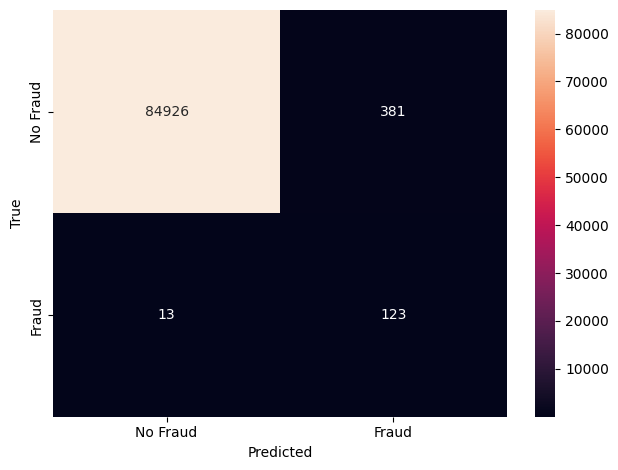

In [ ]:
evaluate_model(RandomForestClassifier(),X_train,X_test)

Binary Classification - Credit Card Fraud Detection
Accuracy: 0.9921234039066981
Classification Report:
               precision    recall  f1-score   support

    No Fraud       1.00      0.99      1.00     85307
       Fraud       0.16      0.90      0.27       136

    accuracy                           0.99     85443
   macro avg       0.58      0.95      0.63     85443
weighted avg       1.00      0.99      0.99     85443



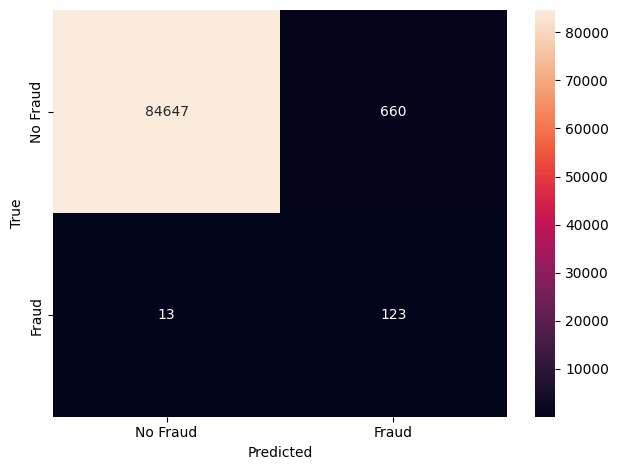

In [ ]:
evaluate_model(XGBClassifier(),X_train,X_test)

## Hyperparameter Tuning of the Random Forest Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]

}

In [ ]:
gs=GridSearchCV(RandomForestClassifier(),param_grid,cv=3)

In [ ]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [ ]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
best_rf=gs.best_estimator_

Binary Classification - Credit Card Fraud Detection
Accuracy: 0.9958334796296946
Classification Report:
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85307
       Fraud       0.26      0.91      0.41       136

    accuracy                           1.00     85443
   macro avg       0.63      0.95      0.70     85443
weighted avg       1.00      1.00      1.00     85443



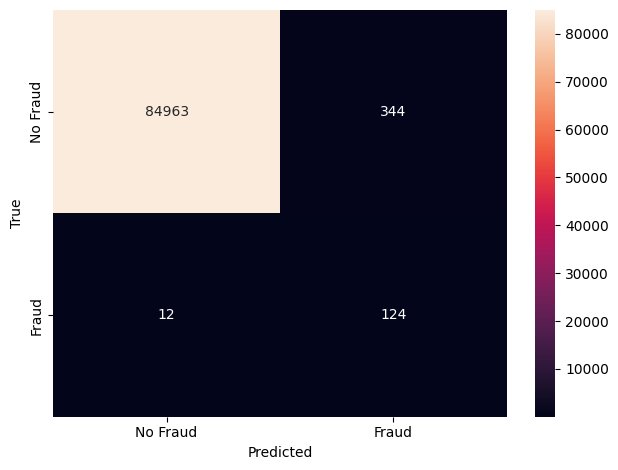

In [ ]:
evaluate_model(best_rf,X_train,X_test)

**Not any improvement observed after hyperparameter tuning.**

## Deep learning model

In [ ]:
# Loading the ternsorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
# Building the model
model=Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=50,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/50
112/112 [==============================] - 4s 27ms/step - loss: 0.6369 - accuracy: 0.6239 - val_loss: 0.3986 - val_accuracy: 0.9831
Epoch 2/50
112/112 [==============================] - 3s 25ms/step - loss: 0.4094 - accuracy: 0.8251 - val_loss: 0.2234 - val_accuracy: 0.9931
Epoch 3/50
112/112 [==============================] - 6s 50ms/step - loss: 0.3236 - accuracy: 0.8798 - val_loss: 0.1707 - val_accuracy: 0.9900
Epoch 4/50
112/112 [==============================] - 3s 25ms/step - loss: 0.2719 - accuracy: 0.9053 - val_loss: 0.1434 - val_accuracy: 0.9897
Epoch 5/50
112/112 [==============================] - 2s 18ms/step - loss: 0.2443 - accuracy: 0.9159 - val_loss: 0.1306 - val_accuracy: 0.9874
Epoch 6/50
112/112 [==============================] - 2s 18ms/step - loss: 0.2205 - accuracy: 0.9206 - val_loss: 0.1256 - val_accuracy: 0.9853
Epoch 7/50
112/112 [==============================] - 3s 25ms/step - loss: 0.2110 - accuracy: 0.9265 - val_loss: 0.1089 - val_accuracy: 0.9855

In [ ]:
loss,acc=model.evaluate(X_test,y_test)

2671/2671 [==============================] - 4s 2ms/step - loss: 0.0730 - accuracy: 0.9830


In [ ]:
y_pred=model.predict(X_test)

2671/2671 [==============================] - 4s 1ms/step


In [ ]:
# Converting y_pred values into classes 0 and 1
custom_threshold = 0.5

In [ ]:
y_pred_classes=(y_pred >= custom_threshold).astype(int)


Binary Classification - Credit Card Fraud Detection
Accuracy: 0.9830413257961448
Classification Report:
               precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     85307
       Fraud       0.08      0.92      0.15       136

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.57     85443
weighted avg       1.00      0.98      0.99     85443



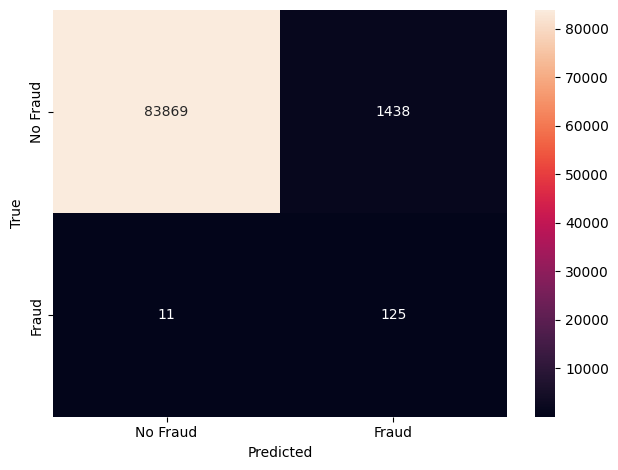

In [ ]:
print("=================================================")
print("Binary Classification - Credit Card Fraud Detection")
print("=================================================")
print("Accuracy:", accuracy_score(y_test, y_pred_classes))

print("Classification Report:\n", classification_report(y_test, y_pred_classes,
                                                        target_names=['No Fraud','Fraud']))
sns.heatmap(confusion_matrix(y_test, y_pred_classes),annot=True,fmt='g',
        yticklabels=['No Fraud','Fraud'],xticklabels=['No Fraud','Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

**Recall of 'Fraud' class improves a little in the deep learning model, even though accuracy is slightly lesser than the Random Forest.**